In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [105]:
image=cv2.imread("/content/cameraman.bmp")

(256, 256, 3)

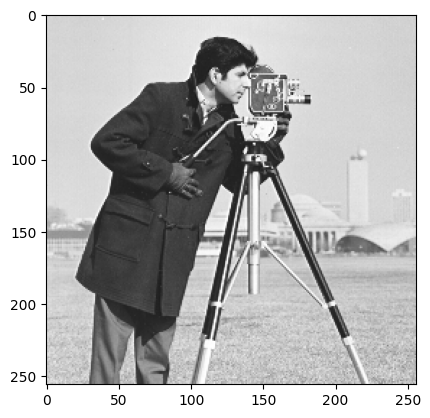

In [106]:
plt.imshow(image)
image.shape

# NEAREST NEIGHBHOUR TRANSFORMATION

In [107]:
def nearest_neighbor_scaling(image, scale_x, scale_y):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale_y), int(width * scale_x)
    scaled_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = min(int(j / scale_x), width - 1)
            y = min(int(i / scale_y), height - 1)
            scaled_image[i, j] = image[y, x]

    return scaled_image

In [108]:
image.shape

(256, 256, 3)

(12800, 12800, 3)


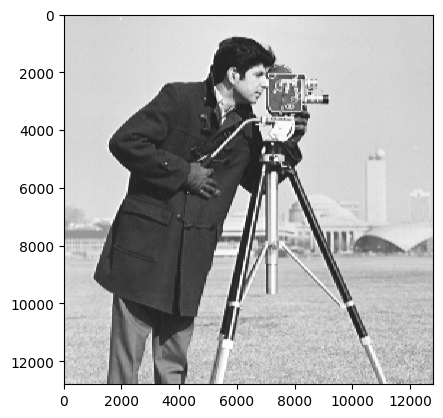

In [114]:
nn_img=nearest_neighbor_scaling(image,50,50)
plt.imshow(nn_img)
print(nn_img.shape)

# BILINEAR TRANSFORMATION

In [96]:
def bilinear_scaling(image, scale_x, scale_y):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale_y), int(width * scale_x)
    scaled_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = j / scale_x
            y = i / scale_y

            x_floor = int(np.floor(x))
            y_floor = int(np.floor(y))
            x_ceil = min(x_floor + 1, width - 1)
            y_ceil = min(y_floor + 1, height - 1)

            dx = x - x_floor
            dy = y - y_floor

            for c in range(image.shape[2]):
                value = (1 - dx) * (1 - dy) * image[y_floor, x_floor, c] + \
                        dx * (1 - dy) * image[y_floor, x_ceil, c] + \
                        (1 - dx) * dy * image[y_ceil, x_floor, c] + \
                        dx * dy * image[y_ceil, x_ceil, c]
                scaled_image[i, j, c] = int(value)

    return scaled_image

(1280, 1280, 3)


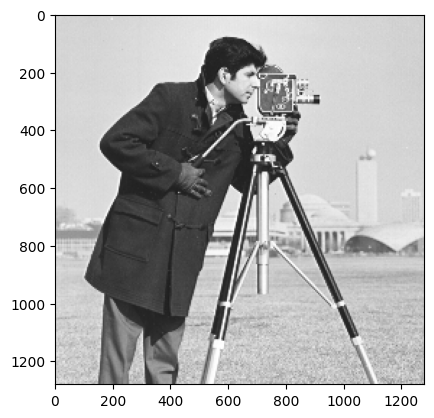

In [97]:
blt_img=nearest_neighbor_scaling(image,5,5)
plt.imshow(blt_img)
print(blt_img.shape)

# ROTATION USING NEAREST NEIGHBHOUR TRANSFORMATION

In [81]:
import numpy as np

def nearest_neighbor_rotation(image, angle):
    theta = np.deg2rad(angle)

    height, width = image.shape[:2]
    angle_rad=math.radians(angle)

    new_height = int(abs(height * math.cos(angle_rad)) + abs(width * math.sin(angle_rad)))
    new_width = int(abs(width * math.cos(angle_rad)) + abs(height * math.sin(angle_rad)))
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    if image.ndim == 3:
        new_image = np.zeros((new_height, new_width, 3), dtype=image.dtype)
    else:
        new_image = np.zeros((new_height, new_width), dtype=image.dtype)

    orig_cx, orig_cy = width / 2, height / 2
    new_cx, new_cy = new_width / 2, new_height / 2

    for i in range(new_height):
        for j in range(new_width):
            y = i - new_cy
            x = j - new_cx

            src_x = x * np.cos(-theta) - y * np.sin(-theta) + orig_cx
            src_y = x * np.sin(-theta) + y * np.cos(-theta) + orig_cy

            src_x = int(round(src_x))
            src_y = int(round(src_y))

            if 0 <= src_x < width and 0 <= src_y < height:
                new_image[i, j] = image[src_y, src_x]

    return new_image


(349, 349, 3)


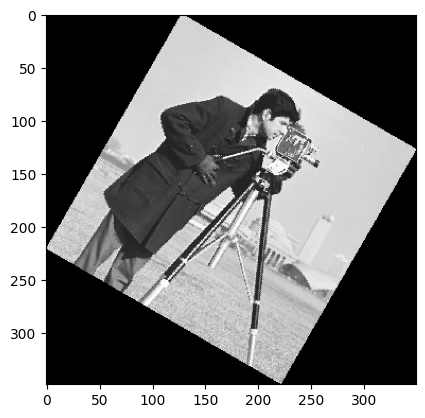

In [88]:
nn_rot_img=nearest_neighbor_rotation(image,30)
plt.imshow(nn_rot_img)
print(nn_rot_img.shape)

# ROTATION USING BILINEAR TRANSFORMATION

In [89]:
def bilinear_rotation(image, angle):
    angle_rad = math.radians(angle)
    height, width = image.shape[:2]

    new_height = int(abs(height * math.cos(angle_rad)) + abs(width * math.sin(angle_rad)))
    new_width = int(abs(width * math.cos(angle_rad)) + abs(height * math.sin(angle_rad)))
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    ox, oy = width // 2, height // 2
    nx, ny = new_width // 2, new_height // 2

    for i in range(new_height):
        for j in range(new_width):
            x = (j - nx) * math.cos(-angle_rad) - (i - ny) * math.sin(-angle_rad) + ox
            y = (j - nx) * math.sin(-angle_rad) + (i - ny) * math.cos(-angle_rad) + oy

            if 0 <= x < width - 1 and 0 <= y < height - 1:
                x1, y1 = int(np.floor(x)), int(np.floor(y))
                x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
                dx, dy = x - x1, y - y1

                for c in range(image.shape[2]):
                    value = (1 - dx) * (1 - dy) * image[y1, x1, c] + \
                            dx * (1 - dy) * image[y1, x2, c] + \
                            (1 - dx) * dy * image[y2, x1, c] + \
                            dx * dy * image[y2, x2, c]
                    rotated_image[i, j, c] = int(value)

    return rotated_image

(362, 362, 3)


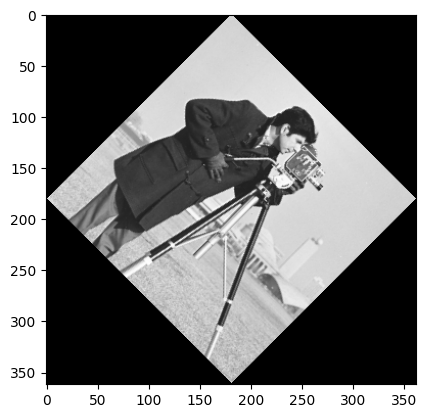

In [90]:
blt_rot_img=bilinear_rotation(image,45)
plt.imshow(blt_rot_img)
print(blt_rot_img.shape)

In [91]:
cv2.imwrite("nn_scaled.jpg", nn_img)
cv2.imwrite("bilinear_scaled.jpg", blt_img)
cv2.imwrite("nn_rotated.jpg", nn_rot_img)
cv2.imwrite("bilinear_rotated.jpg", blt_rot_img)


True

# CREATING A CLASS FOR THE EXPERIMENT

In [9]:
class Image:
  def __init__(self,path):
    img=cv2.imread(path)
    if img is None:
            raise ValueError("Image could not be loaded. Check the file path.")
    self.image=img
    self.height=img.shape[0]
    self.width=img.shape[1]
    self.channels=img.shape[2]

  def show(self):
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()

  def save(self, path):
      img_bgr = cv2.cvtColor(self.image, cv2.COLOR_RGB2BGR)
      cv2.imwrite(path, img_bgr)

  def nearest_neighbhors_transformation(self,scale_x,scale_y):
    height, width = self.height,self.width
    new_height, new_width = int(height * scale_y), int(width * scale_x)
    scaled_image = np.zeros((new_height, new_width, self.channels), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = min(int(j / scale_x), width - 1)
            y = min(int(i / scale_y), height - 1)
            scaled_image[i, j] = self.image[y, x]


    plt.subplot(1, 2, 1)
    plt.imshow(scaled_image)
    plt.title("Nearest Neighbhour Scaled Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(self.image)
    plt.title("Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return scaled_image


  def bilinear_transformation(self,scale_x,scale_y):
    height, width = self.height,self.width
    new_height, new_width = int(height * scale_y), int(width * scale_x)
    scaled_image = np.zeros((new_height, new_width, self.channels), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = j / scale_x
            y = i / scale_y

            x_floor = int(np.floor(x))
            y_floor = int(np.floor(y))
            x_ceil = min(x_floor + 1, width - 1)
            y_ceil = min(y_floor + 1, height - 1)

            dx = x - x_floor
            dy = y - y_floor

            for c in range(self.channels):
                value = (1 - dx) * (1 - dy) * self.image[y_floor, x_floor, c] + \
                        dx * (1 - dy) * self.image[y_floor, x_ceil, c] + \
                        (1 - dx) * dy * self.image[y_ceil, x_floor, c] + \
                        dx * dy * self.image[y_ceil, x_ceil, c]
                scaled_image[i, j, c] = int(value)

    plt.subplot(1, 2, 1)
    plt.imshow(scaled_image)
    plt.title("Bilinear Transformation")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(self.image)
    plt.title("Original Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return scaled_image


  def nearest_neighbor_rotation(self,angle):
    theta = np.deg2rad(angle)

    height, width = self.image.shape[:2]
    angle_rad=math.radians(angle)

    new_height = int(abs(height * math.cos(angle_rad)) + abs(width * math.sin(angle_rad)))
    new_width = int(abs(width * math.cos(angle_rad)) + abs(height * math.sin(angle_rad)))
    rotated_image = np.zeros((new_height, new_width, self.image.shape[2]), dtype=np.uint8)

    if self.image.ndim == 3:
        new_image = np.zeros((new_height, new_width, 3), dtype=self.image.dtype)
    else:
        new_image = np.zeros((new_height, new_width), dtype=self.image.dtype)

    orig_cx, orig_cy = width / 2, height / 2
    new_cx, new_cy = new_width / 2, new_height / 2

    for i in range(new_height):
        for j in range(new_width):
            y = i - new_cy
            x = j - new_cx

            src_x = x * np.cos(-theta) - y * np.sin(-theta) + orig_cx
            src_y = x * np.sin(-theta) + y * np.cos(-theta) + orig_cy

            src_x = int(round(src_x))
            src_y = int(round(src_y))

            if 0 <= src_x < width and 0 <= src_y < height:
                new_image[i, j] = self.image[src_y, src_x]

    plt.subplot(1, 2, 1)
    plt.imshow(new_image)
    plt.title("Rotation Using Nearest Neighbhour")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(self.image)
    plt.title("Original Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return new_image


  def bilinear_rotation(self, angle):
      angle_rad = math.radians(angle)
      height, width = self.image.shape[:2]

      new_height = int(abs(height * math.cos(angle_rad)) + abs(width * math.sin(angle_rad)))
      new_width = int(abs(width * math.cos(angle_rad)) + abs(height * math.sin(angle_rad)))
      rotated_image = np.zeros((new_height, new_width, self.image.shape[2]), dtype=np.uint8)

      ox, oy = width // 2, height // 2
      nx, ny = new_width // 2, new_height // 2

      for i in range(new_height):
          for j in range(new_width):
              x = (j - nx) * math.cos(-angle_rad) - (i - ny) * math.sin(-angle_rad) + ox
              y = (j - nx) * math.sin(-angle_rad) + (i - ny) * math.cos(-angle_rad) + oy

              if 0 <= x < width - 1 and 0 <= y < height - 1:
                  x1, y1 = int(np.floor(x)), int(np.floor(y))
                  x2, y2 = min(x1 + 1, width - 1), min(y1 + 1, height - 1)
                  dx, dy = x - x1, y - y1

                  for c in range(self.image.shape[2]):
                      value = (1 - dx) * (1 - dy) * self.image[y1, x1, c] + \
                              dx * (1 - dy) * self.image[y1, x2, c] + \
                              (1 - dx) * dy * self.image[y2, x1, c] + \
                              dx * dy * self.image[y2, x2, c]
                      rotated_image[i, j, c] = int(value)


      plt.subplot(1, 2, 1)
      plt.imshow(rotated_image)
      plt.title("Rotation Using Bilinear Transformation")
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(self.image)
      plt.title("Original Image")
      plt.axis('off')

      plt.tight_layout()
      plt.show()
      return rotated_image



In [10]:
img=Image("/content/aizen.png")

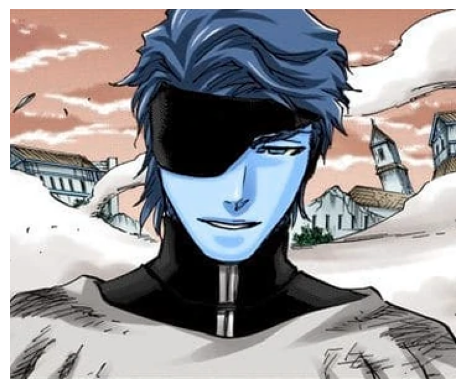

In [11]:
img.show()

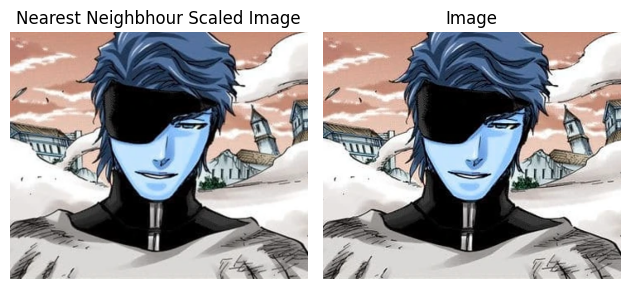

In [12]:
nn=img.nearest_neighbhors_transformation(5,5)

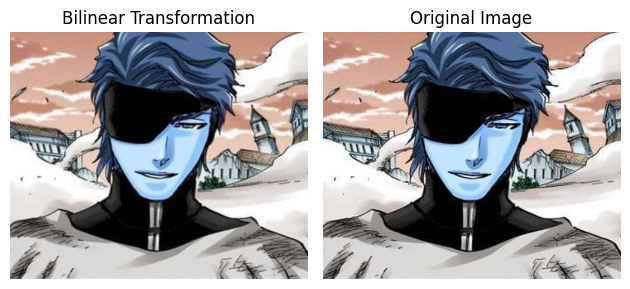

In [13]:
blt=img.bilinear_transformation(2,2)

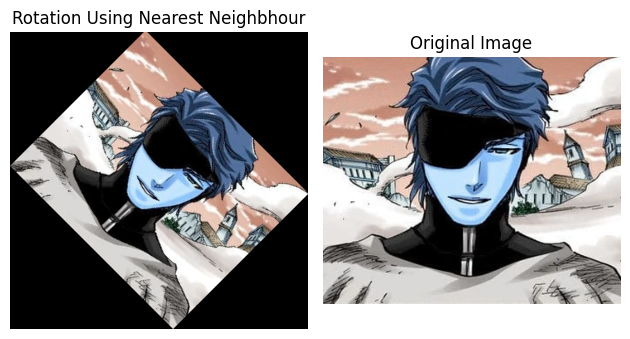

In [14]:
nnr=img.nearest_neighbor_rotation(45)

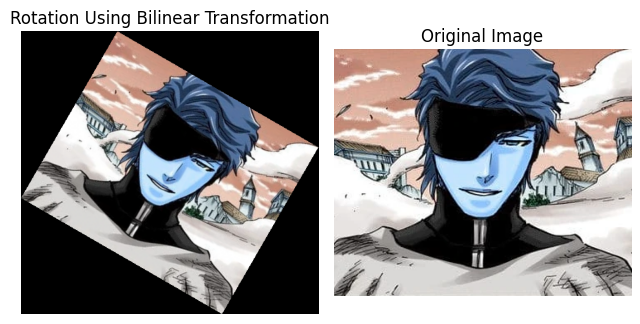

In [15]:
bltr=img.bilinear_rotation(30)

In [17]:
cv2.imwrite("nn_scaled.jpg",nn)
cv2.imwrite("bilinear_scaled.jpg",blt)
cv2.imwrite("nn_rotated.jpg",nnr)
cv2.imwrite("bilinear_rotated.jpg",bltr)

True